
                                   Student Grades Prediction


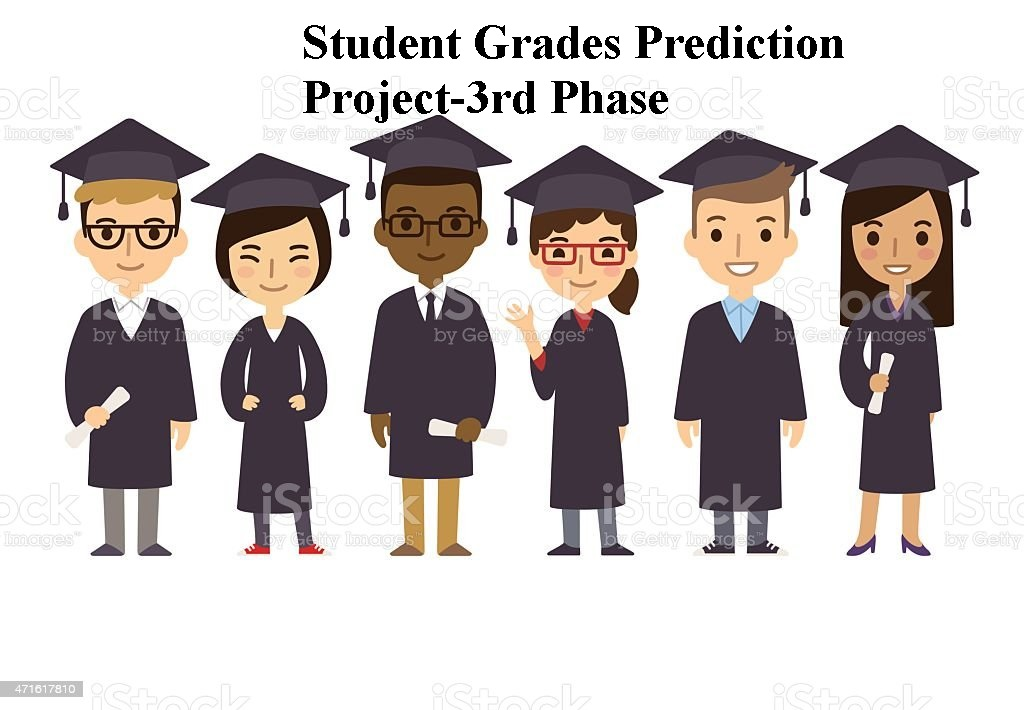

Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description-  total 43 columns

Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam



Predict - CGPA of a student based on different grades in four years.

Importing the necssary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Uploading the data set

In [3]:
Grade_p=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

Checking the first five row in Grade_p data set

In [3]:
Grade_p.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


Checking the shape of the data set

In [4]:
Grade_p.shape

(571, 43)

lets check the last five rows of the data set.

In [5]:
Grade_p.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


Lets check the missing values in the Grade_p data set.

In [6]:
Grade_p.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

Lets check the data type in our data set.

In [7]:
Grade_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

Handling the missing values in Grade_p data set. Filling the missing value with the mode of the respective column.

In [7]:
Grade_p = Grade_p.fillna(Grade_p.mode().iloc[0])

Checking our data set to confrim about the missing values.

In [8]:
Grade_p.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

Now our data set has no missing values.

In [14]:
Grade_p.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [4]:
missing_values_count = Grade_p.isnull().sum()

Create a bar plot

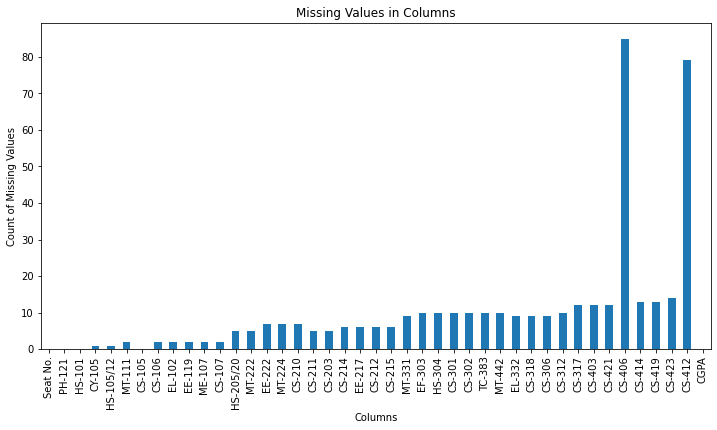

In [5]:
plt.figure(figsize=(12, 6))
missing_values_count.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values in Columns')
plt.xticks(rotation=90)
plt.show()

Histogram of CGPA Distribution:

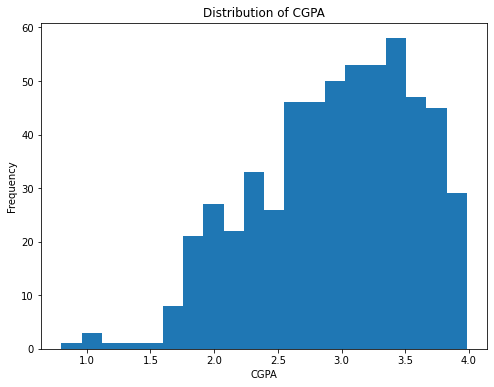

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(Grade_p['CGPA'], bins=20)
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title('Distribution of CGPA')
plt.show()

Box Plot of CGPA by Department:

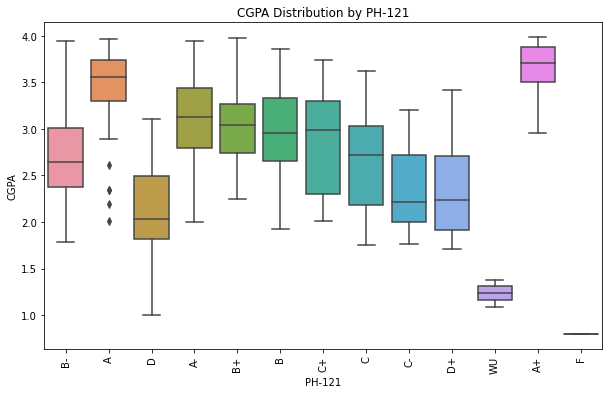

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PH-121', y='CGPA', data=Grade_p)
plt.xlabel('PH-121')
plt.ylabel('CGPA')
plt.title('CGPA Distribution by PH-121')
plt.xticks(rotation=90)
plt.show()

Perform one-hot encoding for categorical columns

In [9]:
Grade_p_encoded = pd.get_dummies(Grade_p, drop_first=True)

 Split the dataset into input features (grades) and target variable (CGPA)

In [11]:
X = Grade_p_encoded.drop([ 'CGPA'], axis=1)
y = Grade_p_encoded['CGPA']

Split the data into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Create a Random Forest regressor model

In [13]:
rf_model = RandomForestRegressor()

Train the model

In [14]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

Make predictions on the test set

In [15]:
y_pred = rf_model.predict(X_test)

Calculate the mean squared error

In [16]:
mse = mean_squared_error(y_test, y_pred)

In [17]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04606016472956522


In [18]:
y_pred

array([2.68969, 3.49868, 2.82208, 2.38891, 3.55668, 3.46531, 2.88791,
       2.50401, 2.1543 , 3.04904, 3.3971 , 3.04006, 3.64388, 2.61701,
       3.77948, 2.5528 , 2.67526, 3.61184, 2.21967, 2.72989, 2.54817,
       3.5829 , 2.23775, 2.63387, 3.03492, 3.38804, 3.38123, 2.68987,
       3.20715, 3.25486, 2.49418, 2.60361, 3.29756, 3.37029, 3.54433,
       2.96462, 2.68342, 3.46148, 2.5785 , 2.13626, 3.54414, 3.53851,
       3.67139, 3.6209 , 3.07393, 2.68274, 2.84671, 3.04009, 3.2662 ,
       3.61989, 3.4207 , 3.37101, 3.26673, 3.57124, 3.36762, 2.67671,
       3.63852, 3.56722, 3.51911, 2.84603, 3.58508, 3.44157, 3.69549,
       3.53392, 3.28521, 3.08443, 3.37893, 3.17771, 3.06342, 2.55477,
       3.55484, 3.00163, 2.51597, 3.60667, 3.63965, 3.2656 , 3.32097,
       2.15778, 3.70041, 2.62776, 2.52572, 3.00204, 2.01148, 2.83689,
       3.66288, 3.72702, 3.1764 , 3.09741, 2.88368, 2.73964, 3.00124,
       3.29354, 2.94043, 2.82678, 2.12452, 3.6749 , 3.59148, 3.19282,
       2.87278, 2.93